# Filter

python=3.7

|topic        |platform   |language   |
|-------------|-----------|-----------|
|Climatechange|Twitter    |en         |

In [ ]:
import pandas as pd
import seaborn as sns
import re
from joblib import dump, load
from joblib import Parallel, delayed  
from tldextract import extract
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

name_suffix = "[lang=en][topic=climatechange][platform=Twitter]"

In [2]:
test = pd.read_csv("/mnt/data/wenlu/LLM_sentiment_affiliation/Twitter_filtering/data/csv_filtered/tweet[en+climatechange][1].csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39366 entries, 0 to 39365
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     39366 non-null  object
 1   conversation_id                        39366 non-null  object
 2   referenced_tweets.replied_to.id        1180 non-null   object
 3   referenced_tweets.retweeted.id         32393 non-null  object
 4   referenced_tweets.quoted.id            435 non-null    object
 5   author_id                              39366 non-null  object
 6   in_reply_to_user_id                    1395 non-null   object
 7   in_reply_to_username                   935 non-null    object
 8   retweeted_user_id                      32393 non-null  object
 9   retweeted_username                     32393 non-null  object
 10  quoted_user_id                         435 non-null    object
 11  quoted_username

In [6]:
data_chunks = []

for chunk in pd.read_csv(
    "/mnt/data/shared/climate_change/data.csv", 
    usecols=['author.username','id','text', 'created_at','conversation_id', 
             'referenced_tweets.replied_to.id','author_id','in_reply_to_user_id',
             'in_reply_to_username'], 
    chunksize=100000
):
    data_chunks.append(chunk)

data = pd.concat(data_chunks, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76596654 entries, 0 to 76596653
Data columns (total 9 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   id                               int64  
 1   conversation_id                  float64
 2   referenced_tweets.replied_to.id  float64
 3   author_id                        int64  
 4   in_reply_to_user_id              float64
 5   in_reply_to_username             object 
 6   created_at                       object 
 7   text                             object 
 8   author.username                  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 5.1+ GB


In [7]:
data.to_csv(f"data/full_data{name_suffix}.csv", index = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76596654 entries, 0 to 76596653
Data columns (total 9 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   id                               int64  
 1   conversation_id                  float64
 2   referenced_tweets.replied_to.id  float64
 3   author_id                        int64  
 4   in_reply_to_user_id              float64
 5   in_reply_to_username             object 
 6   created_at                       object 
 7   text                             object 
 8   author.username                  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 5.1+ GB


In [3]:
df = pd.read_csv(f"data/full_data{name_suffix}.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76596654 entries, 0 to 76596653
Data columns (total 9 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   id                               int64  
 1   conversation_id                  float64
 2   referenced_tweets.replied_to.id  float64
 3   author_id                        int64  
 4   in_reply_to_user_id              float64
 5   in_reply_to_username             object 
 6   created_at                       object 
 7   text                             object 
 8   author.username                  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 5.1+ GB


In [4]:
a = df['author_id'].to_list()

In [4]:
len(a)

76596654

In [5]:
df2 = df.dropna(subset = ['in_reply_to_user_id'])
b = df2['in_reply_to_user_id'].to_list()
len(b)

7720232

In [6]:
retA = list(set(a).intersection(set(b)))
len(retA)

1099265

In [7]:
df_firstcomment = df[df['author_id'].isin(retA)]
df_secondcomment = df[df['in_reply_to_user_id'].isin(retA)]

In [8]:
df_firstcomment.to_csv("data/first_comment_fulldata.csv", index=False)
df_secondcomment.to_csv("data/second_comment_fulldata.csv", index=False)

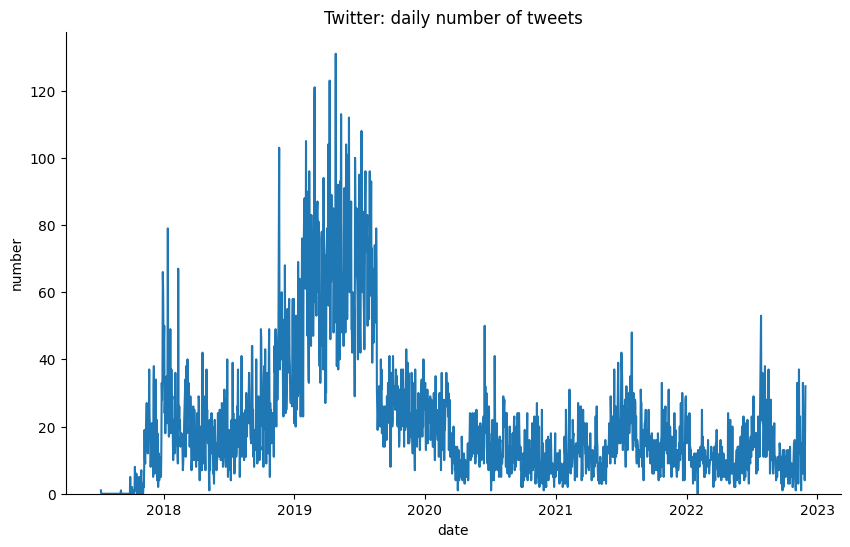

In [ ]:
# df = pd.read_csv(f"data/full_data{name_suffix}.csv")
df = filtered_df

df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date  

# create a date range
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())
# calculate daily data amount
daily_counts = df.groupby('date').size()  
daily_counts = daily_counts.reindex(date_range, fill_value=0)

plt.figure(figsize=(10, 6))

sns.lineplot(data=daily_counts)

ax=plt.gca()  #gca:get current axis
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.title('Twitter: daily number of tweets')
plt.ylim((0,None))

plt.xlabel('date')
plt.ylabel('number')
plt.savefig("pic/Twitter[climatechange]daily_number_of_tweets_v2.png", dpi=300)
plt.show()

In [ ]:

start_date = pd.to_datetime('2017-1-1T00:00:00.000Z')
end_date = pd.to_datetime('2023-12-31T00:00:00.000Z')
df['created_at'] = pd.to_datetime(df['created_at'])
data = df[(start_date < df['created_at']) & (df['created_at'] < end_date)]
#data.to_csv(f"data/full_data{name_suffix}.csv", index=False)
data.loc[:, ['created_at']]

,created_at
163,2019-06-29 23:29:51+00:00
465,2019-06-29 12:59:22+00:00
466,2019-06-29 22:43:09+00:00
797,2019-06-29 21:52:34+00:00
2400,2019-01-09 09:48:38+00:00
...,...
56857360,2018-10-16 06:05:31+00:00
56858621,2018-10-16 05:26:44+00:00
56867709,2018-10-16 02:06:24+00:00
56874056,2018-10-16 00:03:40+00:00


In [ ]:
import numpy as np

sampled_data = pd.DataFrame()

# Grouped and sampled according to each month
for name, group in data.groupby(pd.Grouper(freq='M')):
    if len(group) >= 200:  
        sampled = group.sample(n=200, random_state=1)  
        sampled_data = pd.concat([sampled_data, sampled])
    else:
        print(f"警告：{name.strftime('%Y-%m')} 的数据不足200条, 跳过此月份。")

sampled_data.info()


警告：2017-07 的数据不足84条, 跳过此月份。
警告：2017-08 的数据不足84条, 跳过此月份。
警告：2017-09 的数据不足84条, 跳过此月份。
警告：2017-10 的数据不足84条, 跳过此月份。
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12200 entries, 2017-11-27 17:00:10+00:00 to 2022-11-08 19:02:05+00:00
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               12200 non-null  int64  
 1   conversation_id                  12200 non-null  float64
 2   referenced_tweets.replied_to.id  9831 non-null   float64
 3   author_id                        12200 non-null  int64  
 4   in_reply_to_user_id              9831 non-null   float64
 5   in_reply_to_username             3473 non-null   object 
 6   text                             12200 non-null  object 
 7   author.username                  12200 non-null  object 
 8   text length                      12200 non-null  int64  
 9   date                             12200 non-nu

In [34]:
sampled_data.to_csv(f"data/first_comment[time2017-2023][count:10000]{name_suffix}.csv", index = False)

## Data collect

In [ ]:
# keywords
keywords = ["climate change", "climate science", "climate manipulation", 
            "climate Engineering", "Climate Hacking", "climate modification", 
            "climate science", "Global Warming", "carbon footprint", 
            "The Paris Agreement"]

# settings for result filename
label = 'en+climatechange'

# set file range
start_num = 1
end_num = 27

# file path
source_path = "/mnt/data/Project7/fakenews/csv/"
target_path = "data/csv_filtered/"

# 运行
cmd = ' '.join([
        f'python 1_filter[multi_files][Twitter].py', 
        f'--keywords="{str(keywords)}"', 
        f'--result_label={label}', 
        f'--file_number_range="{str((start_num, end_num))}"', 
        f'--proc_num=3'
    ])
print(cmd)
! {cmd} 

python 1_filter[multi_files][Twitter].py --keywords="['climate change', 'climate science', 'climate manipulation', 'climate Engineering', 'Climate Hacking', 'climate modification', 'climate science', 'Global Warming', 'carbon footprint', 'The Paris Agreement']" --result_label=en+climatechange --file_number_range="(1, 27)" --proc_num=3

Arguments are listed bellow.
keywords: ['climate change', 'climate science', 'climate manipulation', 'climate Engineering', 'Climate Hacking', 'climate modification', 'climate science', 'Global Warming', 'carbon footprint', 'The Paris Agreement']
start_file_num: 1
end_file_num: 27
result_label: en+climatechange
number of process: 3
source_path: /mnt/data/Project7/fakenews/csv/
target_path: data/csv_filtered/

processing 15.csv ... ...
processing 27.csv ... ...
processing 23.csv ... ...
23.csv processed.
processing 16.csv ... ...
15.csv processed.
processing 10.csv ... ...
27.csv processed.
processing 12.csv ... ...
16.csv processed.
processing 5.csv ... 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654531 entries, 0 to 654530
Data columns (total 83 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   id                                     654531 non-null  object
 1   conversation_id                        654531 non-null  object
 2   referenced_tweets.replied_to.id        69933 non-null   object
 3   referenced_tweets.retweeted.id         506070 non-null  object
 4   referenced_tweets.quoted.id            13694 non-null   object
 5   author_id                              654531 non-null  object
 6   in_reply_to_user_id                    73433 non-null   object
 7   in_reply_to_username                   58866 non-null   object
 8   retweeted_user_id                      506070 non-null  object
 9   retweeted_username                     506070 non-null  object
 10  quoted_user_id                         13694 non-null   object
 11  